In [7]:
import pandas as pd
import numpy as np
import networkx as nx
from node2vec import Node2Vec
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
def construct_graph(data):
    G = nx.MultiDiGraph()
    for index, row in data.iterrows():
        G.add_weighted_edges_from([(row['Sender'], row['Receiver'], row['Amount'])])
    return G

In [3]:
df = pd.read_csv('Payments.csv')

In [4]:
myGraph = construct_graph(df)

In [35]:

for node in myGraph.nodes():
    neighbors = list(myGraph.neighbors(node))
    print(f"Node {node}: Neighbors {neighbors}")

Node 1309: Neighbors [1011, 1003, 1004, 1098, 1060, 1079, 1105, 1014, 1020, 1016, 1076, 1243, 1007, 1108, 1175, 1230, 1236, 1138, 1075, 1121, 1189, 1040, 1180, 1218, 1370, 1027, 1101, 1068, 1184, 1168, 1172, 1201, 1034, 1196, 1208, 1263, 1327, 1349, 1458, 1473, 1127, 1136, 1222, 1246, 1323, 1405, 1264, 1493, 1501, 1373, 1443, 1324, 1364, 1369, 1463, 1523, 1311, 1328, 1377, 1220, 1310, 1449, 1584, 1194, 1199, 1214, 1356, 1037, 1238, 1676, 1788, 1845, 1318, 1352, 1375]
Node 1011: Neighbors [1079, 1080, 1014, 1023, 1016, 1007, 1189, 1278, 1247, 1064, 1070, 1356, 1196, 1473, 1508, 1443, 1517, 1523, 1377, 1128, 1265, 1676]
Node 1259: Neighbors [1011, 1004, 1073, 1079, 1023, 1030, 1049, 1039, 1243, 1108, 1138, 1099, 1231, 1149, 1224, 1172, 1034, 1398, 1471, 1483, 1127, 1373, 1369, 1348, 1376, 1215, 1310, 1569, 1813, 1318]
Node 1568: Neighbors [1011, 1010, 1147, 1172]
Node 1147: Neighbors [1011, 1004, 1060, 1079, 1023, 1020, 1016, 1112, 1049, 1039, 1243, 1068, 1001, 1010, 1026, 1175, 1138, 11

In [5]:
# Step 2: Embed nodes using Node2Vec
node2vec = Node2Vec(myGraph, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)


Computing transition probabilities:   0%|          | 0/799 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:01<00:00, 33.34it/s]


In [ ]:

node_embeddings = [model.wv.get_vector(str(node)) for node in myGraph.nodes()]

# Convert node embeddings to array
embedding_matrix = np.array(node_embeddings)

# Apply KMeans clustering
num_clusters = 5  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embedding_matrix)

# Plot the graph with nodes colored by cluster
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(myGraph, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(myGraph, pos, node_color=clusters, cmap=plt.cm.Set1, node_size=300, with_labels=False, edge_color='gray', linewidths=0.5)
plt.title('Graph with Nodes Colored by Cluster')
plt.show()

/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

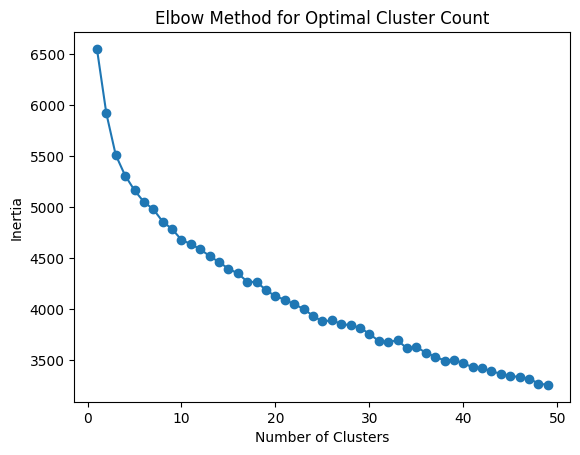

In [38]:
# Initialize a list to store inertia values
inertia_values = []

# Try different cluster counts
cluster_range = range(1, 50)  # You can adjust the range of cluster counts
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(embedding_matrix)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Count')
plt.show()

/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

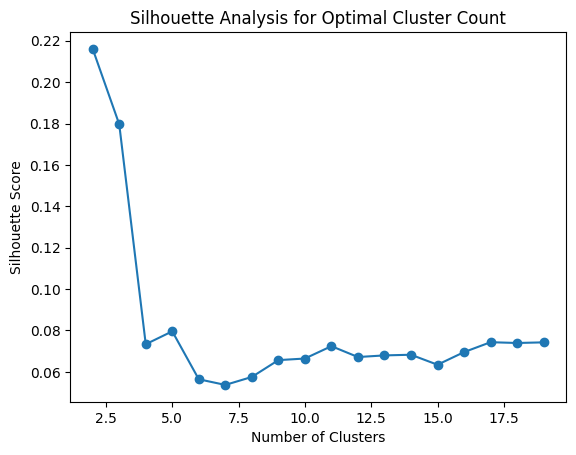

In [39]:
# Initialize a list to store silhouette scores
silhouette_scores = []

# Try different cluster counts
cluster_range = range(2, 20)  # You can adjust the range of cluster counts
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embedding_matrix)
    silhouette_scores.append(silhouette_score(embedding_matrix, cluster_labels))

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Cluster Count')
plt.show()

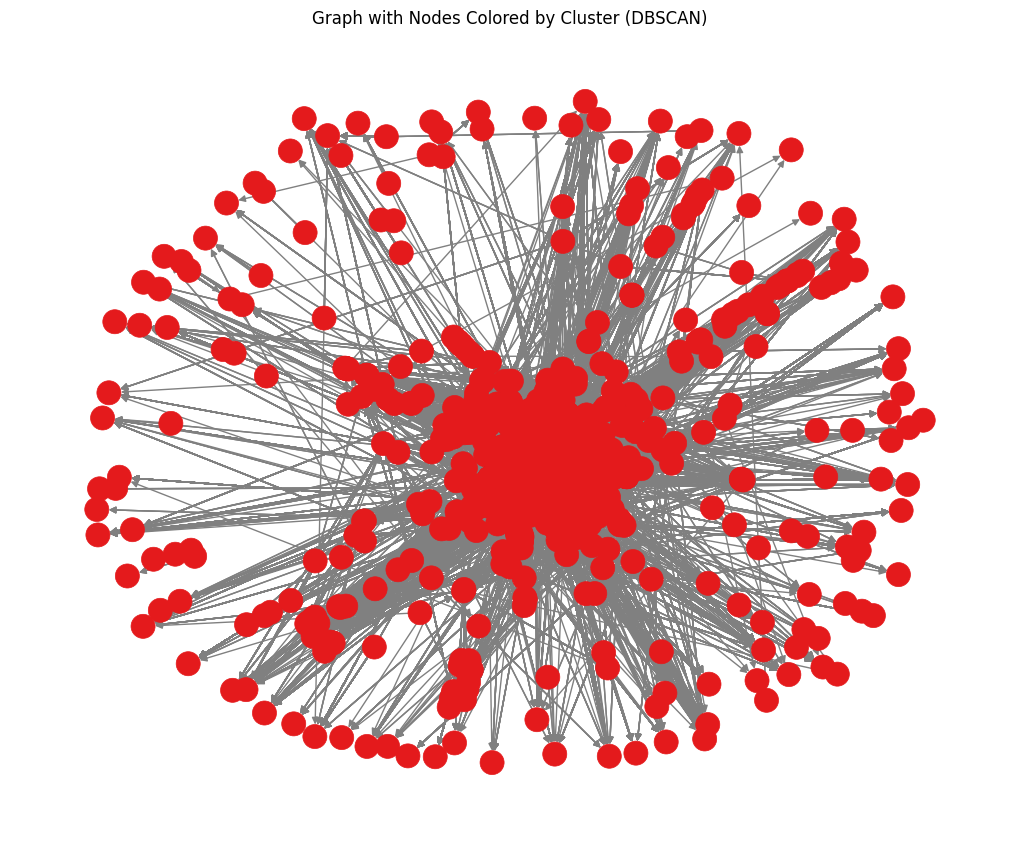

In [40]:

# Apply DBSCAN clustering
eps = 0.5  # The maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 5  # The number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(embedding_matrix)

# Plot the graph with nodes colored by cluster
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(myGraph, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(myGraph, pos, node_color=clusters, cmap=plt.cm.Set1, node_size=300, with_labels=False, edge_color='gray', linewidths=0.5)
plt.title('Graph with Nodes Colored by Cluster (DBSCAN)')
plt.show()

In [42]:
X = np.array([model.wv.get_vector(str(node)) for node in myGraph.nodes()])



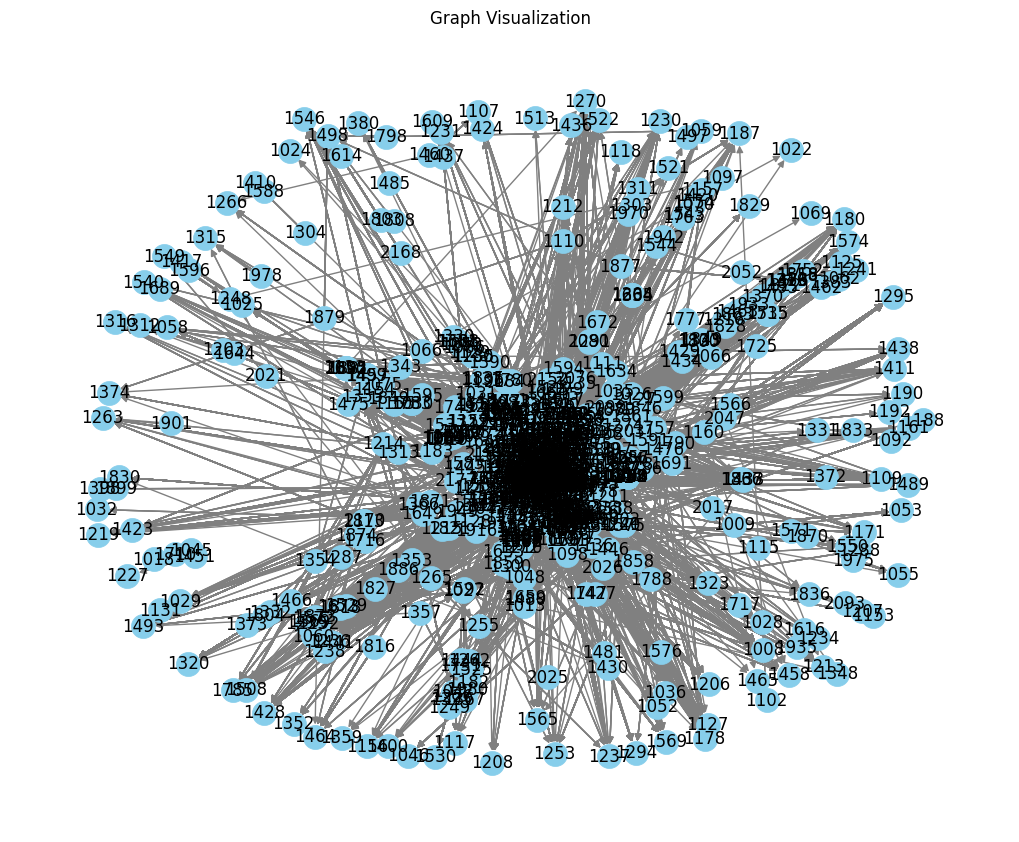

In [41]:
# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(myGraph, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(myGraph, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='gray', linewidths=0.5)
plt.title('Graph Visualization')
plt.show()

/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


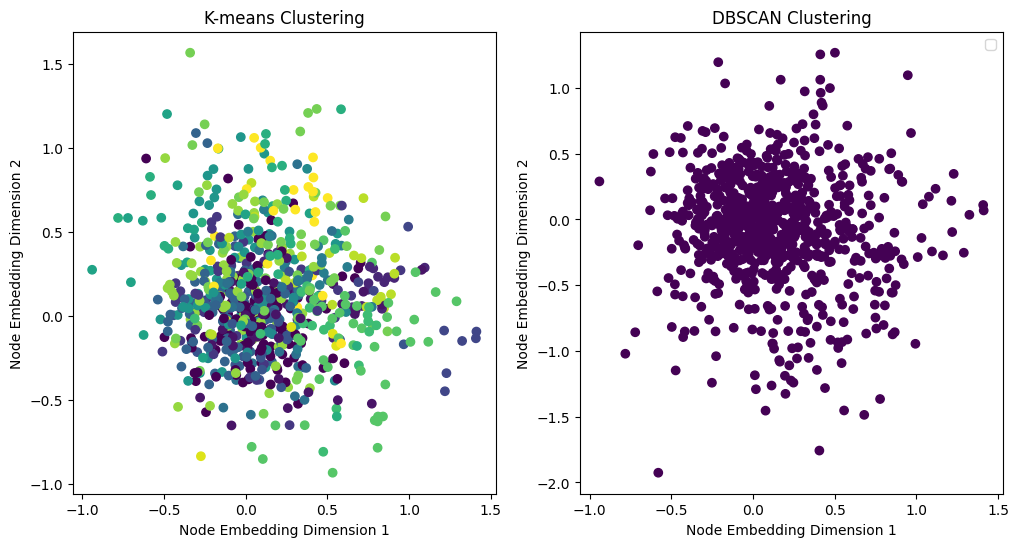

K-means cluster sizes:
[139  40  14  61   9  24  76  57  18  17  57  19  26  19  44  46  82  24
   4  23]
[  0 799]


In [43]:

import matplotlib.pyplot as plt

# Use K-means clustering
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Use DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=20)
dbscan_labels = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 2], c=kmeans_labels)
plt.title("K-means Clustering")
plt.xlabel("Node Embedding Dimension 1")
plt.ylabel("Node Embedding Dimension 2")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering")
plt.xlabel("Node Embedding Dimension 1")
plt.ylabel("Node Embedding Dimension 2")
plt.legend()
plt.show()

# Print the cluster sizes
print("K-means cluster sizes:")
print(np.bincount(kmeans_labels))
# change -1 to 1 to avoid error
dbscan_labels[dbscan_labels == -1] = 1
print(np.bincount(dbscan_labels))

In [12]:
print(node_embeddings)

[array([ 5.76988235e-02, -1.97819576e-01,  3.32984537e-01, -1.63552567e-01,
        2.87485182e-01, -7.02433527e-01, -2.71436900e-01, -5.47528148e-01,
       -1.26333073e-01, -3.16153578e-02,  2.56346256e-01, -5.17688453e-01,
        5.03054745e-02, -3.55420634e-02, -3.49681705e-01,  5.55736385e-02,
        1.93458647e-01, -1.16248161e-01,  1.65907428e-01,  2.87575573e-01,
        2.45473385e-01,  3.88949066e-01,  1.35256171e-01, -1.49178118e-01,
        7.34041184e-02,  6.09721639e-04, -9.00372490e-02, -3.46427292e-01,
        2.21447632e-01, -1.17745951e-01,  3.41347367e-01, -9.28332955e-02,
       -3.89053017e-01,  1.26633897e-01,  2.22114205e-01,  6.28461018e-02,
       -2.71362867e-02, -3.16915572e-01,  6.11845311e-03, -7.29694813e-02,
        2.68314272e-01,  4.17656936e-02, -8.05583224e-02,  5.80459796e-02,
       -3.31050344e-02,  1.47315180e-02,  5.75862564e-02, -2.03309774e-01,
       -5.72809577e-01, -5.56053035e-02, -1.16072625e-01,  1.78543609e-02,
       -2.49825761e-01, 

In [44]:
print(len(myGraph.nodes))

799


In [25]:
print(list(myGraph.neighbors(1309)))

TypeError: 'list' object is not callable

In [5]:
df.describe()

,Sender,Receiver,Amount
count,130535.000000,130535.000000,1.305350e+05
mean,1309.358287,1182.851258,6.980968e+04
std,294.435026,169.809657,5.696676e+04
min,1001.000000,1001.000000,1.501000e+03
25%,1078.000000,1060.000000,2.411100e+04
50%,1214.000000,1112.000000,5.622000e+04
75%,1488.000000,1276.000000,1.079405e+05
max,2190.000000,1887.000000,2.124500e+06


In [7]:
df.isnull().values.any()

False

In [4]:
df.head()

,Sender,Receiver,Amount
0,1309,1011,123051
1,1309,1011,118406
2,1309,1011,112456
3,1309,1011,120593
4,1309,1011,166396


In [2]:
import networkx as nx

In [7]:
df.loc[(df['Sender'] == 1309) & (df['Receiver'] == 1011), 'Amount'].values[0]

123051